# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading and Cleaning Dataset

In [2]:
data = pd.read_csv('nyc-rolling-sales.csv', na_values = ' -  ')
data = data[data['SALE PRICE'] > 0]

Cleaning the columns

In [ ]:
data = data.drop(data.columns[[[0]]], axis = 1)

data = data.drop('TAX CLASS AT PRESENT', axis = 1)
data = data.drop('TAX CLASS AT TIME OF SALE', axis = 1)

data = data.drop('YEAR BUILT', axis = 1)

data = data.drop('LAND SQUARE FEET', axis = 1)
data = data.drop('GROSS SQUARE FEET', axis = 1)

data = data.drop('BUILDING CLASS CATEGORY', axis = 1)
data = data.drop('BUILDING CLASS AT PRESENT', axis = 1)

data = data.drop('BLOCK', axis = 1)
data = data.drop('LOT', axis = 1)

data = data.drop('EASE-MENT', axis = 1)

data = data.drop('APARTMENT NUMBER', axis = 1)

data = data.drop('RESIDENTIAL UNITS', axis = 1)
data = data.drop('COMMERCIAL UNITS', axis = 1)
data = data.drop('TOTAL UNITS', axis = 1)

data = data.drop('ZIP CODE', axis = 1)



Filling and dealing with missing values

In [ ]:
data['SALE PRICE'] = data['SALE PRICE'].fillna(-1)
data = data[data['SALE PRICE'] > 0]

Changing data types for columns

In [3]:
data['SALE PRICE'] = data['SALE PRICE'].astype('int64')

data['BOROUGH'] = data['BOROUGH'].astype(str)
data['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])

# Data Analysis

In [4]:
#Splitting our dataset by Quartiles into 4 subsets by sales price range.
low = data[(data['SALE PRICE'] <= 370000)]
medlow = data[(data['SALE PRICE'] > 370000) & (data['SALE PRICE'] <= 625500)]
medhigh = data[(data['SALE PRICE'] <= 1070000) & (data['SALE PRICE'] > 625500)]
high = data[(data['SALE PRICE'] > 1070000) & (data['SALE PRICE'] < 3100000)]

Outliers/Boxplot

[Text(0.5, 1.0, 'Low Data')]

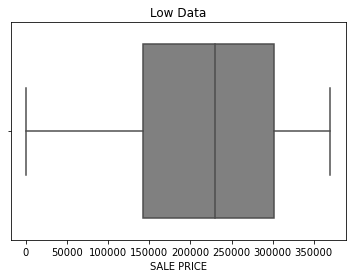

In [5]:
#Boxplot across low subset
sns.boxplot(x = low['SALE PRICE'], color = 'grey').set(title='Low Data')

[Text(0.5, 1.0, 'Medium Low Data')]

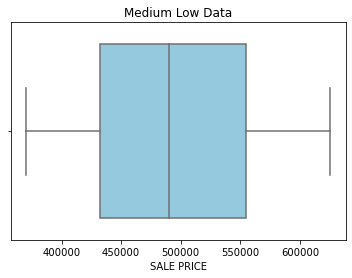

In [6]:
#Boxplot across medium low subset
sns.boxplot(x = medlow['SALE PRICE'], color = 'skyblue').set(title='Medium Low Data')

[Text(0.5, 1.0, 'Medium High Data')]

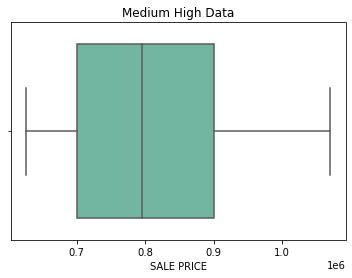

In [7]:
#Boxplot across medium high subset
sns.boxplot(x = medhigh['SALE PRICE'], palette = 'Set2').set(title='Medium High Data')

[Text(0.5, 1.0, 'High Data')]

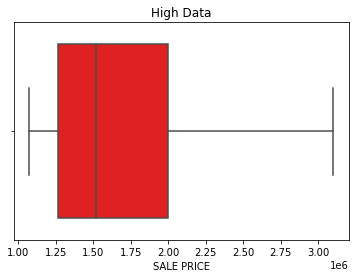

In [8]:
#Boxplot across high subset
sns.boxplot(x = high['SALE PRICE'], color = 'red').set(title='High Data')

Total sales per borough

Text(0.5, 1.0, 'Sales Sum by Borough: Low')

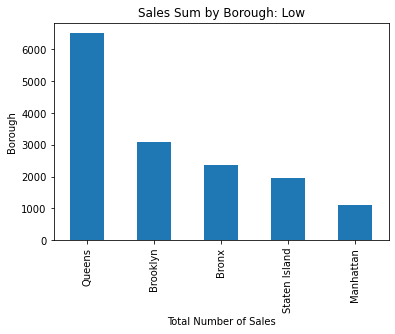

In [9]:
#Bar graph plotting number of sales by borough across the low subset
low['BOROUGH'].value_counts().plot.bar()


plt.title("Sales Sum by Borough: Low")
plt.ylabel("Borough")
plt.xlabel("Total Number of Sales")



colors = ['cyan','red','yellow', 'orange', 'green']
plt.title("Sales Sum by Borough: Low")


Text(0, 0.5, '')

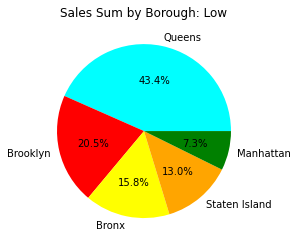

In [10]:
#Pie chart showing proportion of Property Sales by borough across the low subset
low['BOROUGH'].value_counts().plot.pie(autopct ="%.1f%%",colors=colors)
plt.title("Sales Sum by Borough: Low")
plt. ylabel("")

Text(0.5, 0, 'Total Number of Sales')

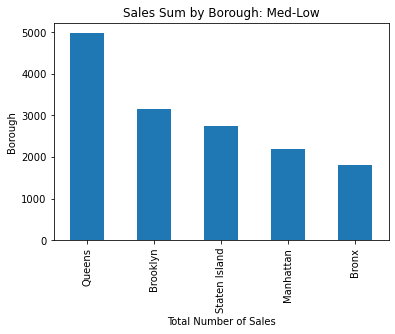

In [11]:
#Bar graph showing number of propety sales by borough across the med-low subset
medlow['BOROUGH'].value_counts().plot.bar()

plt.title("Sales Sum by Borough: Med-Low")
plt.ylabel("Borough")
plt.xlabel("Total Number of Sales")

Text(0, 0.5, '')

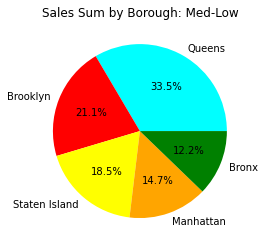

In [12]:
#Pie chart showing the proportion of propety sales by borough across the med-low subset
medlow['BOROUGH'].value_counts().plot.pie(autopct ="%.1f%%",colors=colors)
plt.title("Sales Sum by Borough: Med-Low")
plt. ylabel("")

Text(0.5, 0, 'Total Number of Sales')

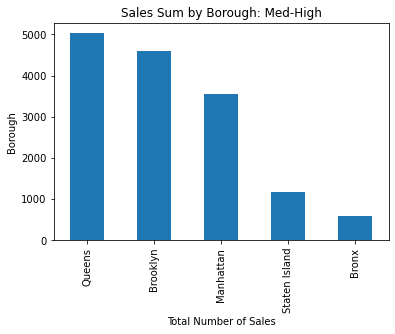

In [13]:
#Bar chart showing the number of property sales by borough across the med-high subset
medhigh['BOROUGH'].value_counts().plot.bar()

plt.title("Sales Sum by Borough: Med-High")
plt.ylabel("Borough")
plt.xlabel("Total Number of Sales")



Text(0, 0.5, '')

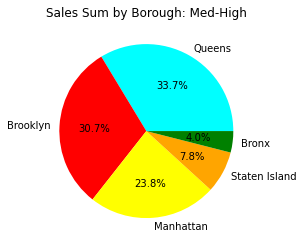

In [14]:
#Pie chart showing Sales Sum of borough across the med-high subset
medhigh['BOROUGH'].value_counts().plot.pie(autopct ="%.1f%%",colors=colors)
plt.title("Sales Sum by Borough: Med-High")
plt. ylabel("")

Text(0.5, 0, 'Total Number of Sales')

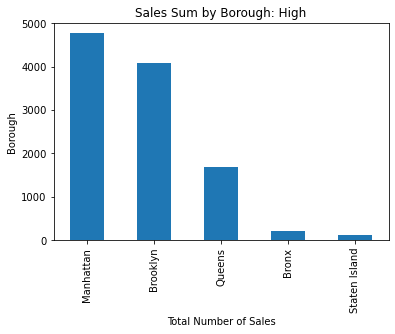

In [15]:
#Bar graph showing the number of property sales by borough across high subset
high['BOROUGH'].value_counts().plot.bar()

plt.title("Sales Sum by Borough: High")
plt.ylabel("Borough")
plt.xlabel("Total Number of Sales")

Text(0, 0.5, '')

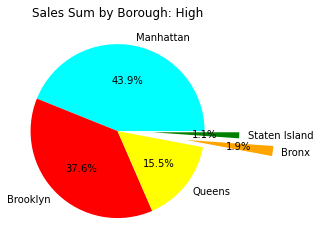

In [16]:
#Pie chart showing Proportion of Property Sales by Borough across the high subset
high['BOROUGH'].value_counts().plot.pie(autopct ="%.1f%%",colors=colors, explode = [0.0, 0.0, 0.0,  0.8, 0.4])
plt.title("Sales Sum by Borough: High")
plt. ylabel("")

Total revenue per borough

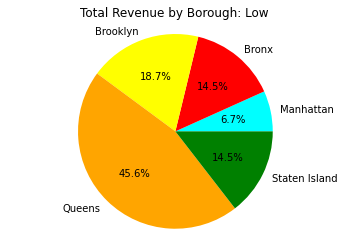

In [17]:
#Pie Chart showing Proportion of Total Revenue of Property Sales by Borough across low subset
filtered_manhatt = low.loc[(low['BOROUGH'] == 'Manhattan')]
manhatt_sum = filtered_manhatt['SALE PRICE'].sum()

filtered_bronx= low.loc[(low['BOROUGH'] == 'Bronx')]
bronx_sum = filtered_bronx['SALE PRICE'].sum()

filtered_brook = low.loc[(low['BOROUGH'] == 'Brooklyn')]
brook_sum = filtered_brook['SALE PRICE'].sum()

filtered_queens= low.loc[(low['BOROUGH'] == 'Queens')]
queens_sum = filtered_queens['SALE PRICE'].sum()

filtered_staten = low.loc[(low['BOROUGH'] == 'Staten Island')]
staten_sum = filtered_staten['SALE PRICE'].sum()

labels = ['Manhattan','Bronx','Brooklyn', 'Queens', 'Staten Island']


values = [manhatt_sum, bronx_sum, brook_sum, queens_sum, staten_sum]
colors = ['cyan','red','yellow', 'orange', 'green']
plt.title("Total Revenue by Borough: Low");
plt.pie(x = values,labels=labels,autopct ="%.1f%%",colors=colors)

plt.axis('equal')
plt.show()


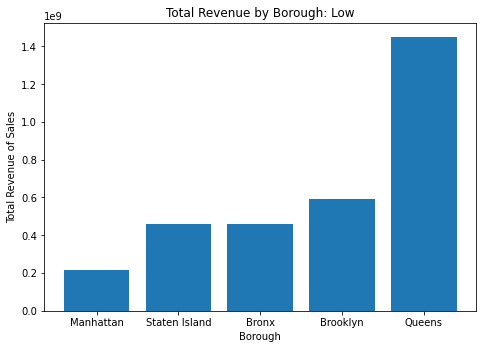

In [18]:
#Bar Graph showing Total Number of Property Sales by Borough across low subset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

labels = ['Manhattan','Staten Island','Bronx', 'Brooklyn', 'Queens']

ax.bar(labels,sorted(values))


plt.title("Total Revenue by Borough: Low");
plt.xlabel("Borough")
plt.ylabel("Total Revenue of Sales")


plt.show()

(-1.11213065887702, 1.1005776504227152, -1.1132881118663316, 1.109000421988562)

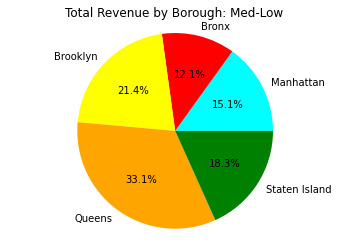

In [19]:
#Pie chart showing Proportion of Total Revenue by Borough across med-low subset
filtered_manhatt = medlow.loc[(medlow['BOROUGH'] == 'Manhattan')]
manhatt_sum = filtered_manhatt['SALE PRICE'].sum()

filtered_bronx= medlow.loc[(medlow['BOROUGH'] == 'Bronx')]
bronx_sum = filtered_bronx['SALE PRICE'].sum()

filtered_brook = medlow.loc[(medlow['BOROUGH'] == 'Brooklyn')]
brook_sum = filtered_brook['SALE PRICE'].sum()

filtered_queens= medlow.loc[(medlow['BOROUGH'] == 'Queens')]
queens_sum = filtered_queens['SALE PRICE'].sum()

filtered_staten = medlow.loc[(medlow['BOROUGH'] == 'Staten Island')]
staten_sum = filtered_staten['SALE PRICE'].sum()

labels = ['Manhattan','Bronx','Brooklyn', 'Queens', 'Staten Island']

values = [manhatt_sum, bronx_sum, brook_sum, queens_sum, staten_sum]
colors = ['cyan','red','yellow', 'orange', 'green']
plt.title("Total Revenue by Borough: Med-Low");
plt.pie(x = values,labels=labels,autopct ="%.1f%%",colors=colors)
plt.axis('equal')

Text(0, 0.5, 'Total Revenue of Sales')

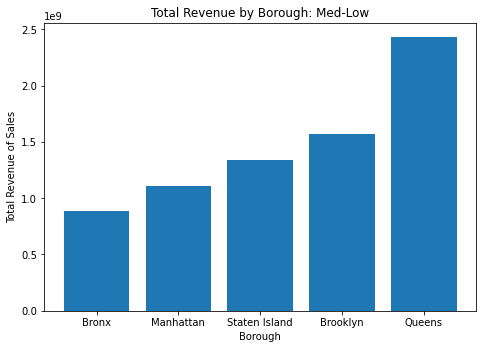

In [20]:
#Bar Graph showing Total Revenue of Property Sales by Borough across med-low subset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

labels = ['Bronx','Manhattan','Staten Island', 'Brooklyn', 'Queens']

ax.bar(labels,sorted(values))


plt.title("Total Revenue by Borough: Med-Low");
plt.xlabel("Borough")
plt.ylabel("Total Revenue of Sales")


(-1.1107147041925725,
 1.10051023347906,
 -1.1087767017797487,
 1.1010450122998248)

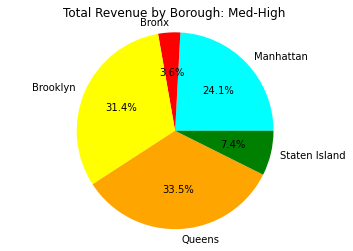

In [21]:
#Pie Chart showing Proportion of Total Revenue by Borough across Med-High Subset
filtered_manhatt = medhigh.loc[(medhigh['BOROUGH'] == 'Manhattan')]
manhatt_sum = filtered_manhatt['SALE PRICE'].sum()

filtered_bronx= medhigh.loc[(medhigh['BOROUGH'] == 'Bronx')]
bronx_sum = filtered_bronx['SALE PRICE'].sum()

filtered_brook = medhigh.loc[(medhigh['BOROUGH'] == 'Brooklyn')]
brook_sum = filtered_brook['SALE PRICE'].sum()

filtered_queens= medhigh.loc[(medhigh['BOROUGH'] == 'Queens')]
queens_sum = filtered_queens['SALE PRICE'].sum()

filtered_staten = medhigh.loc[(medhigh['BOROUGH'] == 'Staten Island')]
staten_sum = filtered_staten['SALE PRICE'].sum()

labels = ['Manhattan','Bronx','Brooklyn', 'Queens', 'Staten Island']

values = [manhatt_sum, bronx_sum, brook_sum, queens_sum, staten_sum]
colors = ['cyan','red','yellow', 'orange', 'green']
plt.title("Total Revenue by Borough: Med-High");
plt.pie(x = values,labels=labels,autopct ="%.1f%%",colors=colors)
plt.axis('equal')

Text(0, 0.5, 'Total Revenue of Sales')

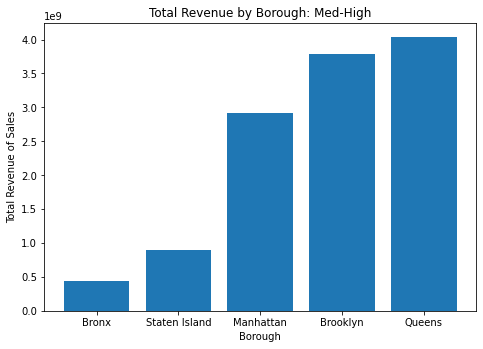

In [22]:
#Bar Graph Showing Total Revenue by Borough across med-high subset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

labels = ['Bronx','Staten Island','Manhattan', 'Brooklyn', 'Queens']

ax.bar(labels,sorted(values))


plt.title("Total Revenue by Borough: Med-High");
plt.xlabel("Borough")
plt.ylabel("Total Revenue of Sales")


(-1.111863937995265,
 1.1005649540422666,
 -1.1144549918660476,
 1.1212807179841506)

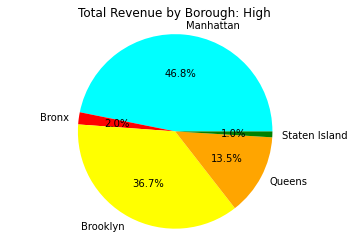

In [23]:
#Pie Chart Showing Proportion of Total Revenue by Borough across high subset
filtered_manhatt = high.loc[(high['BOROUGH'] == 'Manhattan')]
manhatt_sum = filtered_manhatt['SALE PRICE'].sum()

filtered_bronx= high.loc[(high['BOROUGH'] == 'Bronx')]
bronx_sum = filtered_bronx['SALE PRICE'].sum()


filtered_brook = high.loc[(high['BOROUGH'] == 'Brooklyn')]
brook_sum = filtered_brook['SALE PRICE'].sum()

filtered_queens= high.loc[(high['BOROUGH'] == 'Queens')]
queens_sum = filtered_queens['SALE PRICE'].sum()

filtered_staten = high.loc[(high['BOROUGH'] == 'Staten Island')]
staten_sum = filtered_staten['SALE PRICE'].sum()

labels = ['Manhattan','Bronx','Brooklyn', 'Queens', 'Staten Island']

values = [manhatt_sum, bronx_sum, brook_sum, queens_sum, staten_sum]
plt.title("Total Revenue by Borough: High");
colors = ['cyan','red','yellow', 'orange', 'green']
plt.pie(x = values,labels=labels,autopct ="%.1f%%",colors=colors)
plt.axis('equal')

Text(0, 0.5, 'Total Revenue of Sales')

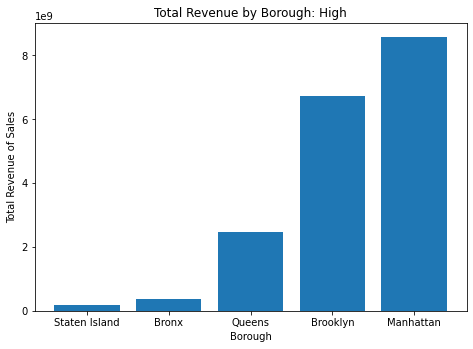

In [24]:
#Bar Graph showing Total Revenue by Borough across High subset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

labels = ['Staten Island','Bronx','Queens', 'Brooklyn', 'Manhattan']

ax.bar(labels,sorted(values))


plt.title("Total Revenue by Borough: High");
plt.xlabel("Borough")
plt.ylabel("Total Revenue of Sales")


Median per Borough

(-1.1271373114051277,
 1.1012922529240536,
 -1.1130603396753127,
 1.1138907324218945)

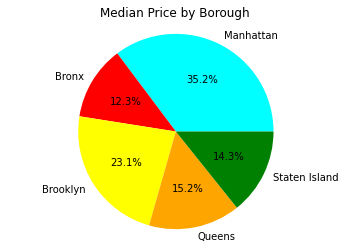

In [25]:
#Pie chart showing median price by borough 
filtered_manhatt = data.loc[(data['BOROUGH'] == 'Manhattan')]
manhatt_med = filtered_manhatt['SALE PRICE'].median()

filtered_bronx= data.loc[(data['BOROUGH'] == 'Bronx')]
bronx_med = filtered_bronx['SALE PRICE'].median()

filtered_brook = data.loc[(data['BOROUGH'] == 'Brooklyn')]
brook_med = filtered_brook['SALE PRICE'].median()

filtered_queens= data.loc[(data['BOROUGH'] == 'Queens')]
queens_med = filtered_queens['SALE PRICE'].median()

filtered_staten = data.loc[(data['BOROUGH'] == 'Staten Island')]
staten_med = filtered_staten['SALE PRICE'].median()

labels = ['Manhattan','Bronx','Brooklyn', 'Queens', 'Staten Island']

values = [manhatt_med, bronx_med, brook_med, queens_med, staten_med]
colors = ['cyan','red','yellow', 'orange', 'green']
plt.title("Median Price by Borough");
plt.pie(x = values,labels=labels,autopct ="%.1f%%",colors=colors)
plt.axis('equal')

Text(0, 0.5, 'Price')

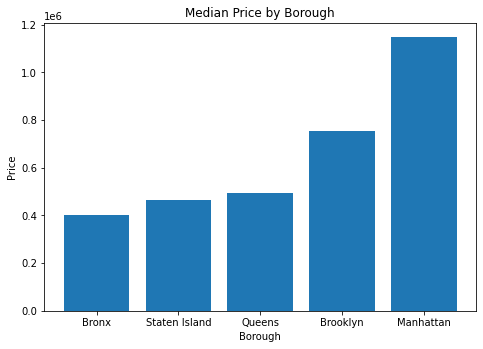

In [26]:
#Bar Chart Showing Median Price by Borough
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Bronx','Staten Island','Queens', 'Brooklyn', 'Manhattan']

ax.bar(labels,sorted(values))


plt.title("Median Price by Borough");
plt.xlabel("Borough")
plt.ylabel("Price")

Time Series

In [27]:
times = data['SALE DATE'].unique()
dateTime = [low['SALE PRICE'][low['SALE DATE'] == times[i]].sum() for i in range(342)]
dateTime1 = [medlow['SALE PRICE'][medlow['SALE DATE'] == times[i]].sum() for i in range(342)]
dateTime2 = [medhigh['SALE PRICE'][medhigh['SALE DATE'] == times[i]].sum() for i in range(342)]
dateTime3 = [high['SALE PRICE'][high['SALE DATE'] == times[i]].sum() for i in range(342)]


summy = [dateTime[i] for i in range(342) if(dateTime[i] > 4000000)]
timers = [times[i] for i in range(342) if(dateTime[i] > 4000000)]


fr = {'SumOne': summy, 'TimeOne': timers}

frame = pd.DataFrame(fr)
frame = frame.sort_values('TimeOne')

summy2 = [dateTime1[i] for i in range(342) if(dateTime1[i] > 8000000)]
timers2 = [times[i] for i in range(342) if(dateTime1[i] > 8000000)]


fr2 = {'SumTwo': summy2, 'TimeTwo': timers2}

frame2 = pd.DataFrame(fr2)
frame2 = frame2.sort_values('TimeTwo')

summy3 = [dateTime2[i] for i in range(342) if(dateTime2[i] > 20000000)]
timers3 = [times[i] for i in range(342) if(dateTime2[i] > 20000000)]


fr3 = {'SumThree': summy3, 'TimeThree': timers3}

frame3 = pd.DataFrame(fr3)
frame3 = frame3.sort_values('TimeThree')

summy4 = [dateTime3[i] for i in range(342) if(dateTime3[i] > 30000000)]
timers4 = [times[i] for i in range(342) if(dateTime3[i] > 30000000)]


fr4 = {'SumFour': summy4, 'TimeFour': timers4}

frame4 = pd.DataFrame(fr4)
frame4 = frame4.sort_values('TimeFour')

Text(0.5, 1.0, 'Sale Sums Low')

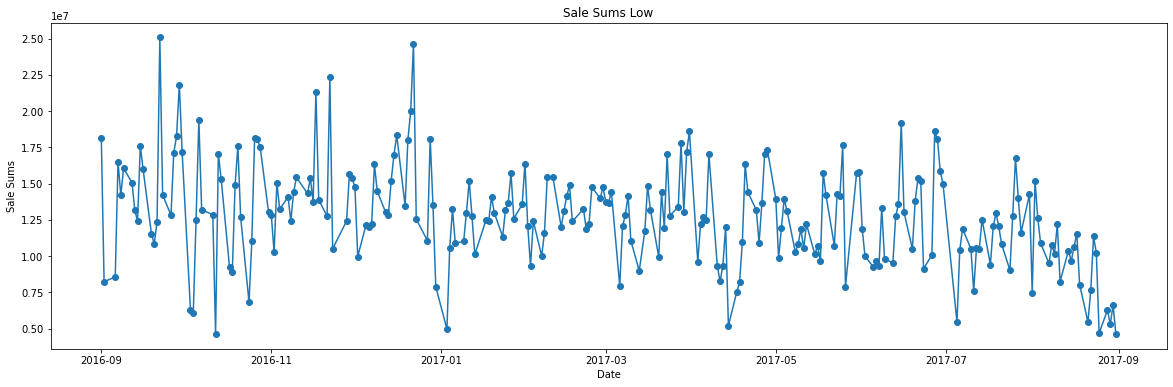

In [28]:
##Line Graph showing the Number of Property Sales Throughout the Year across the low subset
plt.rcParams["figure.figsize"] = (20,6)
plt.plot_date(frame['TimeOne'],frame['SumOne'], linestyle='solid')
plt.xlabel('Date') 
plt.ylabel('Sale Sums') 
plt.title("Sale Sums Low")

Text(0.5, 1.0, 'Sale Sums Medium Low')

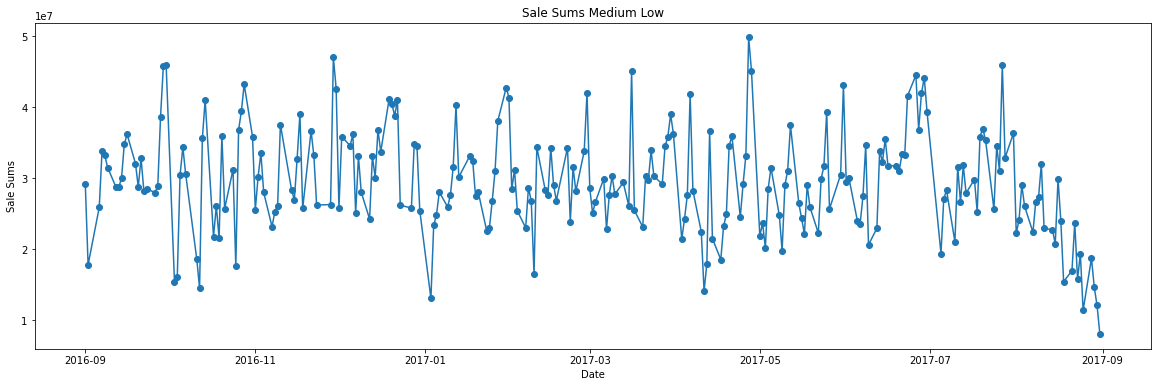

In [29]:
#Line Graph showing the Number of Property Sales Throughout the Year across the medium low subset
plt.rcParams["figure.figsize"] = (20,6)
plt.plot_date(frame2['TimeTwo'],frame2['SumTwo'], linestyle='solid')

plt.xlabel('Date') 
plt.ylabel('Sale Sums') 
plt.title("Sale Sums Medium Low")

Text(0.5, 1.0, 'Sale Sums Medium High')

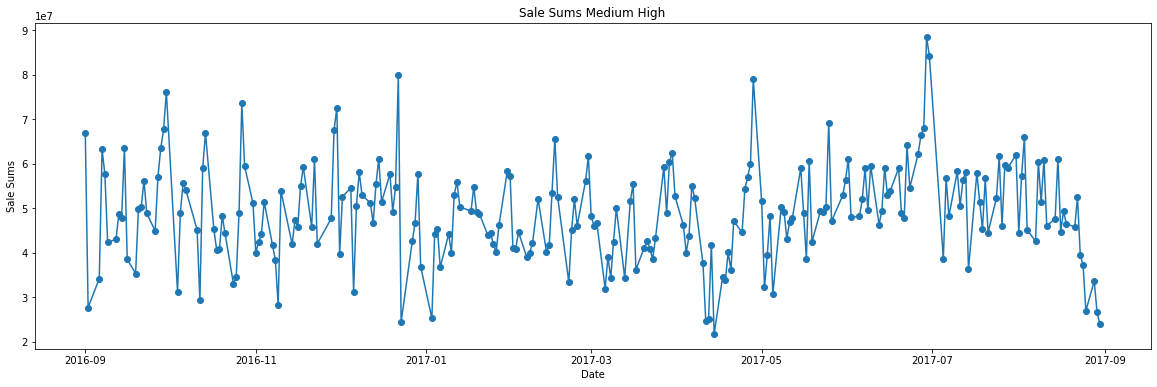

In [30]:
#Line Graph showing the Number of Property Sales Throughout the Year across the medium high subset
plt.rcParams["figure.figsize"] = (20,6)
plt.plot_date(frame3['TimeThree'],frame3['SumThree'], linestyle='solid')

plt.xlabel('Date') 
plt.ylabel('Sale Sums') 
plt.title("Sale Sums Medium High")

Text(0.5, 1.0, 'Sale Sums High')

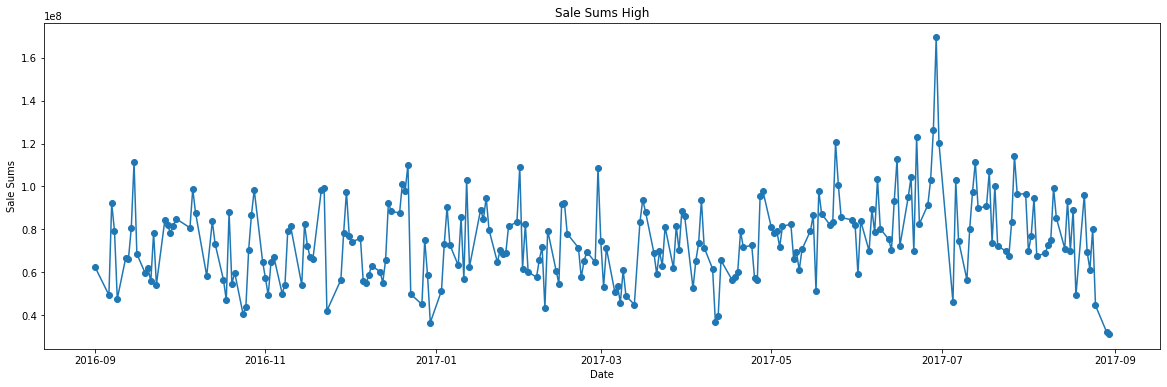

In [31]:
#Line Graph showing the Number of Property Sales Throughout the Year across the High subset
plt.rcParams["figure.figsize"] = (20,6)
plt.plot_date(frame4['TimeFour'],frame4['SumFour'], linestyle='solid')

plt.xlabel('Date') 
plt.ylabel('Sale Sums') 
plt.title("Sale Sums High")

Top 10 Building Classes

Text(0.5, 0, 'Counts')

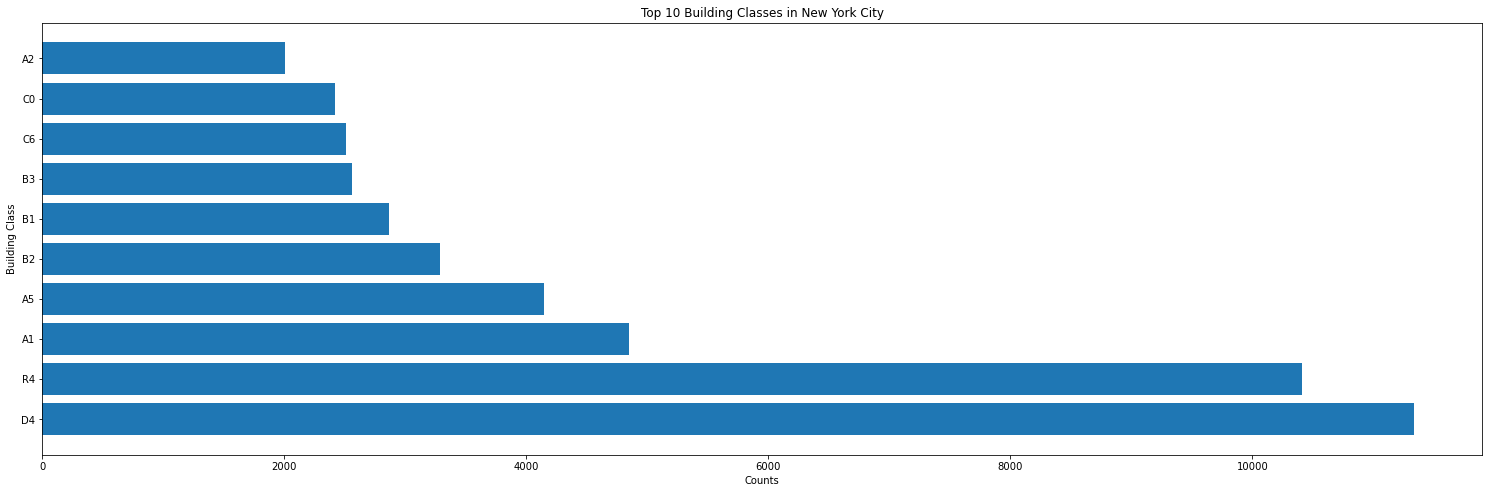

In [32]:
#Bar Graph shpwing the Top 10 Building Classes and their Number in New York City
top10 = data['BUILDING CLASS AT TIME OF SALE'].value_counts().head(10)



values = ['D4', 'R4', 'A1', 'A5', 'B2', 'B1', 'B3', 'C6', 'C0', 'A2']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(values ,top10)

plt.title("Top 10 Building Classes in New York City");
plt.ylabel("Building Class")
plt.xlabel("Counts")


Text(0.5, 0, 'Number of Buildings')

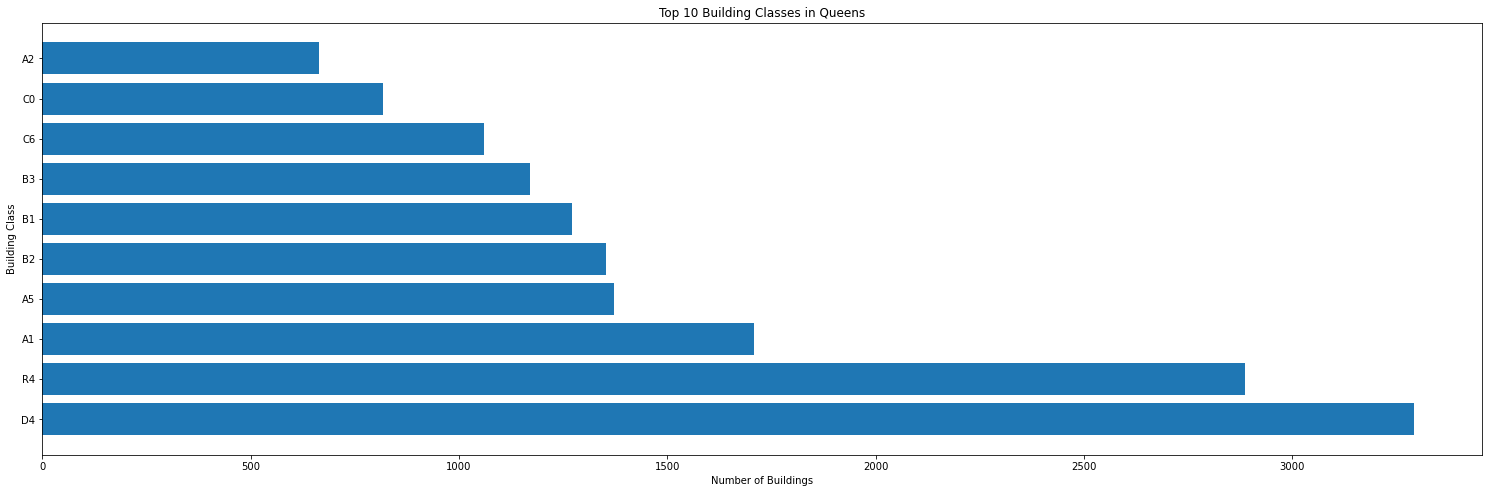

In [33]:
#Buidling Class in Queens
filtered_Queens= data.loc[(data['BOROUGH'] == 'Queens')]
data_Q = filtered_Queens['BUILDING CLASS AT TIME OF SALE'].value_counts().head(10)

values = ['D4', 'R4', 'A1', 'A5', 'B2', 'B1', 'B3', 'C6', 'C0', 'A2']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(values ,data_Q)

plt.title("Top 10 Building Classes in Queens");
plt.ylabel("Building Class")
plt.xlabel("Number of Buildings")

Text(0.5, 0, 'Number of Buildings')

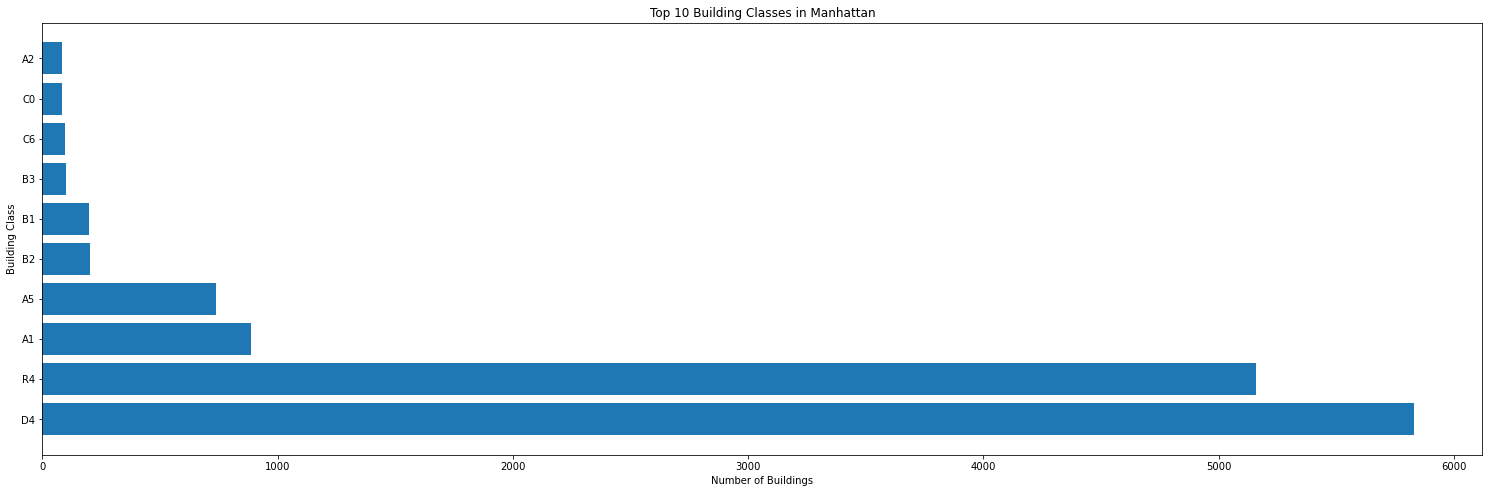

In [34]:
#Building Class Manhattan
filtered_M= data.loc[(data['BOROUGH'] == 'Manhattan')]
data_M = filtered_M['BUILDING CLASS AT TIME OF SALE'].value_counts().head(10)

values = ['D4', 'R4', 'A1', 'A5', 'B2', 'B1', 'B3', 'C6', 'C0', 'A2']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(values ,data_M)

plt.title("Top 10 Building Classes in Manhattan");
plt.ylabel("Building Class")
plt.xlabel("Number of Buildings")

Text(0.5, 0, 'Number of Buildings')

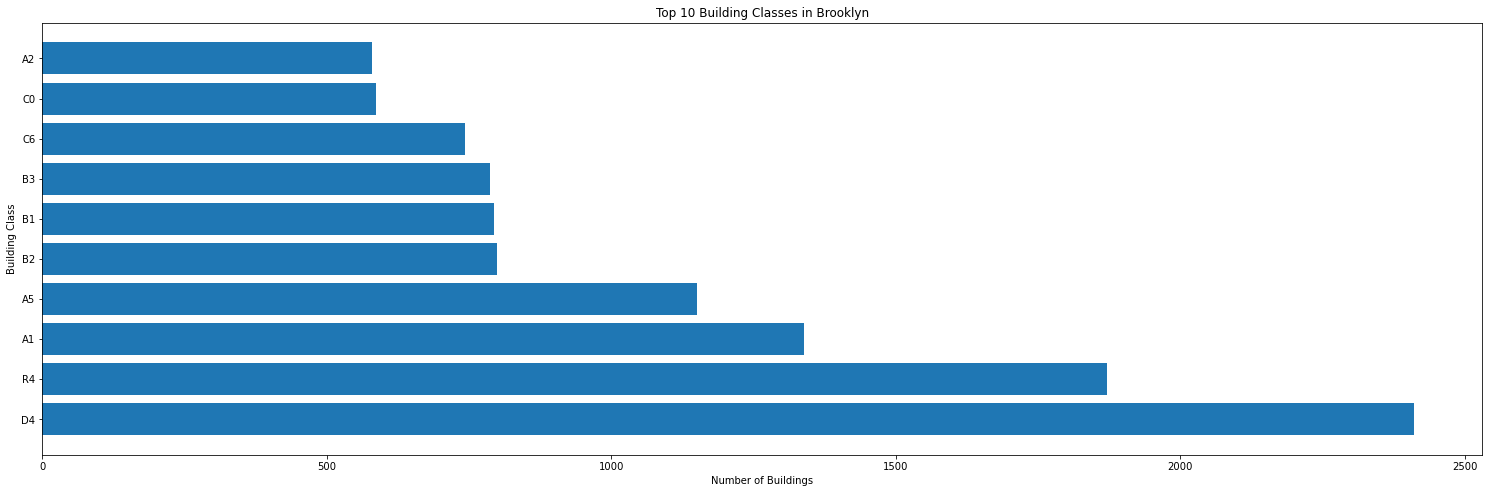

In [35]:
#Buidling Class Brooklyn
filtered_Br= data.loc[(data['BOROUGH'] == 'Brooklyn')]
data_Bn = filtered_Br['BUILDING CLASS AT TIME OF SALE'].value_counts().head(10)

values = ['D4', 'R4', 'A1', 'A5', 'B2', 'B1', 'B3', 'C6', 'C0', 'A2']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(values ,data_Bn)

plt.title("Top 10 Building Classes in Brooklyn");
plt.ylabel("Building Class")
plt.xlabel("Number of Buildings")

Text(0.5, 0, 'Number of Buildings')

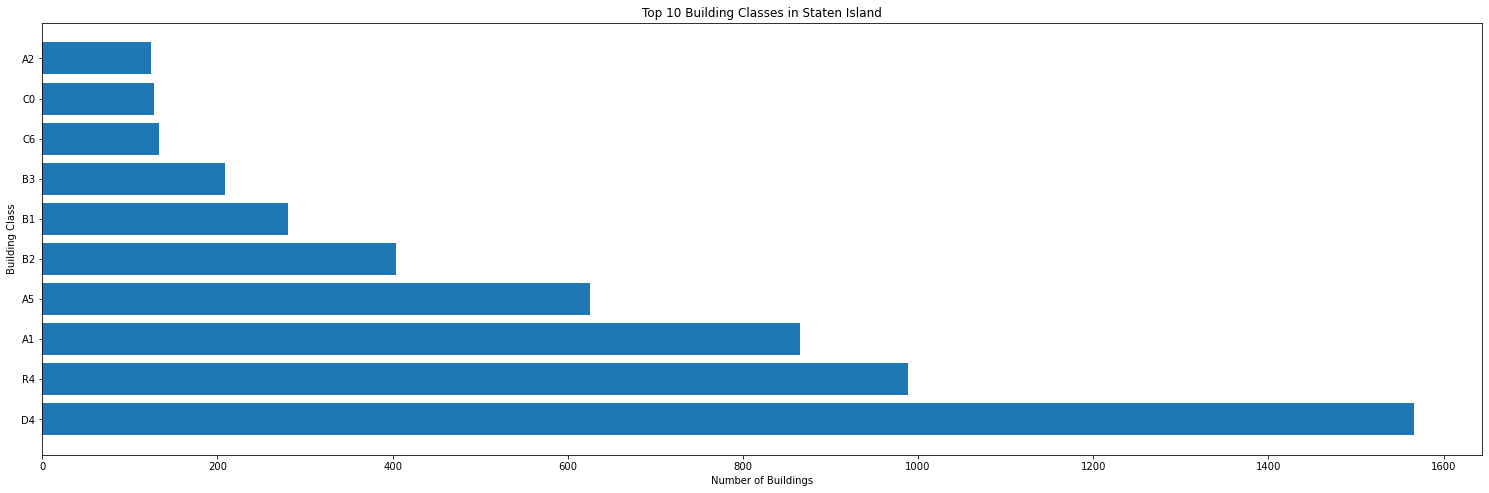

In [36]:
#Buidling Class Staten Island
filtered_St= data.loc[(data['BOROUGH'] == 'Staten Island')]
data_S = filtered_St['BUILDING CLASS AT TIME OF SALE'].value_counts().head(10)

values = ['D4', 'R4', 'A1', 'A5', 'B2', 'B1', 'B3', 'C6', 'C0', 'A2']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(values ,data_S)

plt.title("Top 10 Building Classes in Staten Island");
plt.ylabel("Building Class")
plt.xlabel("Number of Buildings")

Text(0.5, 0, 'Number of Buildings')

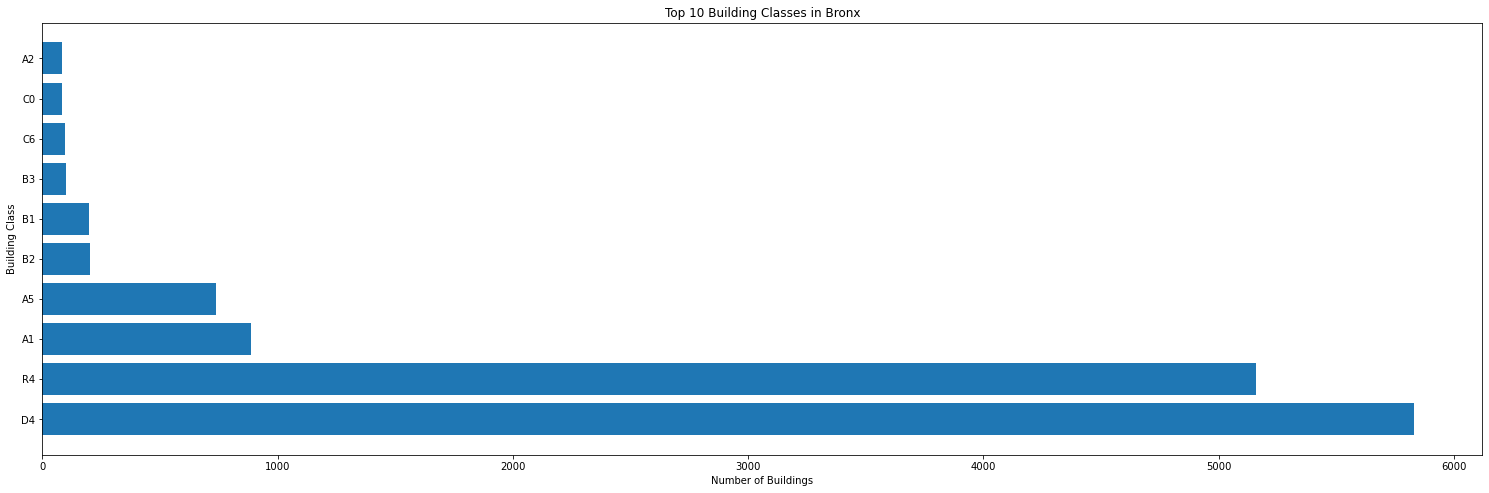

In [37]:
#Building Class Bronx
filtered_Bx= data.loc[(data['BOROUGH'] == 'Bronx')]
data_Bx = filtered_Bx['BUILDING CLASS AT TIME OF SALE'].value_counts().head(10)

values = ['D4', 'R4', 'A1', 'A5', 'B2', 'B1', 'B3', 'C6', 'C0', 'A2']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(values ,data_M)

plt.title("Top 10 Building Classes in Bronx");
plt.ylabel("Building Class")
plt.xlabel("Number of Buildings")

Building Pie charts with 0 vals: High End

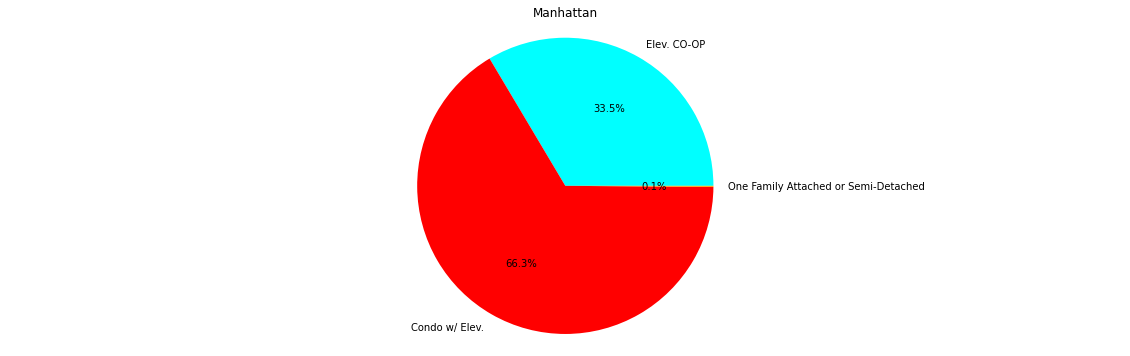

In [45]:
#Pie Chart Showing Proportion of Building Class of Sales in Manhattan Across high subset
mann = high[high['BOROUGH'] == 'Manhattan']
values1 = [mann['SALE PRICE'][mann['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(),
         mann['SALE PRICE'][mann['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),mann['SALE PRICE'][mann['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ]#,mann['SALE PRICE'][mann['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP','Condo w/ Elev.', 'One Family Attached or Semi-Detached']#, 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'orange']#, 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Manhattan')
plt.show()

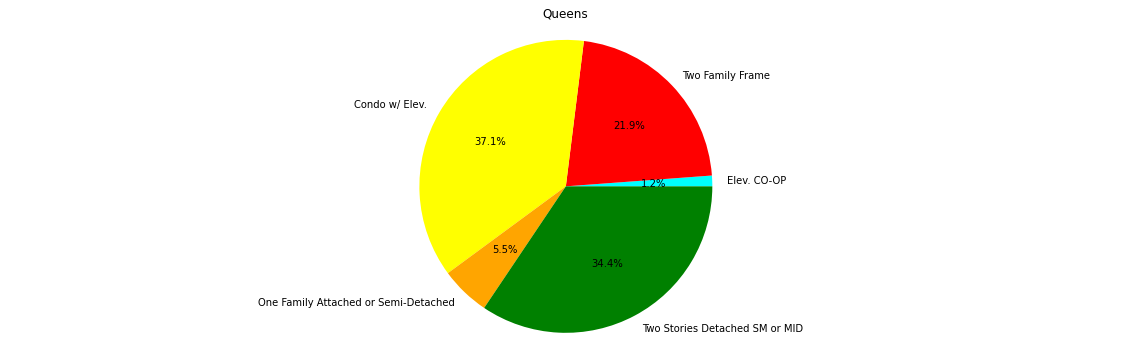

In [44]:
#Pie Chart showing Proportion of Building Class of Sales in Queens across High subset
queen = high[high['BOROUGH'] == 'Queens']
values1 = [queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(), queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'B2'].sum(),
         queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ,queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP', 'Two Family Frame', 'Condo w/ Elev.', 'One Family Attached or Semi-Detached', 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'yellow', 'orange', 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Queens')
plt.show()

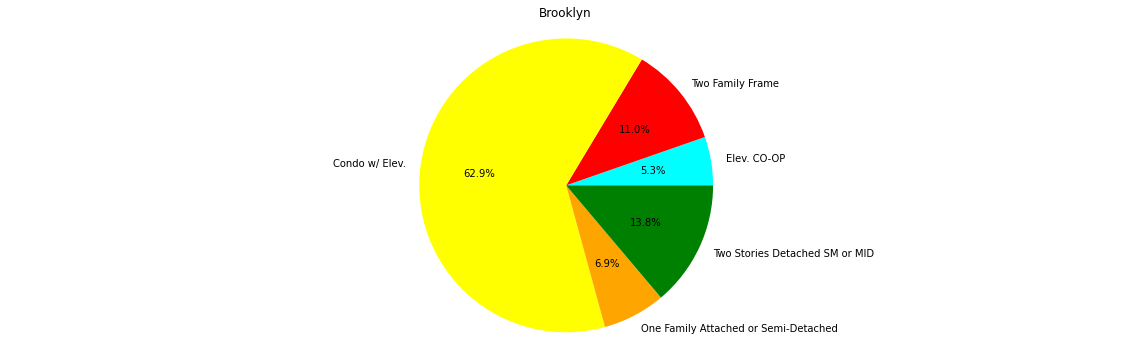

In [40]:
#Pie chart Showing Proportion of Building Class in Brooklyn across High dataset
brook = high[high['BOROUGH'] == 'Brooklyn']
values1 = [brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(), brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'B2'].sum(),
         brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ,brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP', 'Two Family Frame', 'Condo w/ Elev.', 'One Family Attached or Semi-Detached', 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'yellow', 'orange', 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Brooklyn')
plt.show()

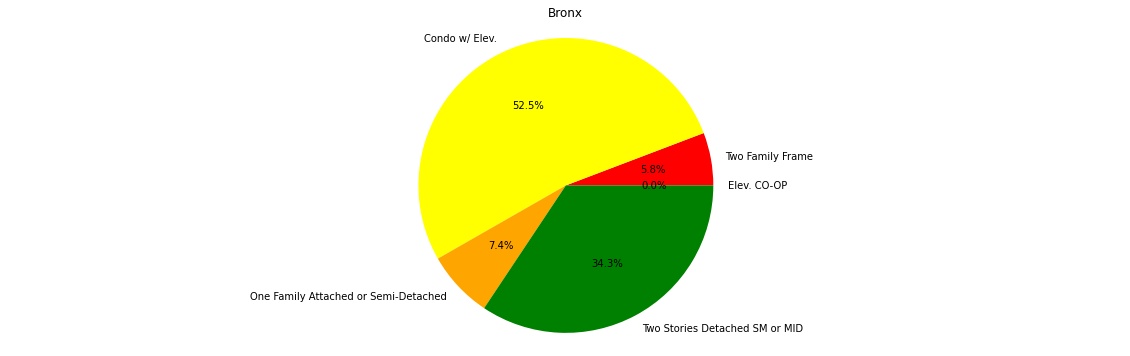

In [42]:
#Pie chart showing Proportion Building Classes by in the Bronx Across high dataset
bronx = high[high['BOROUGH'] == 'Bronx']
values1 = [bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(), bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'B2'].sum(),
         bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ,bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP', 'Two Family Frame', 'Condo w/ Elev.', 'One Family Attached or Semi-Detached', 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'yellow', 'orange', 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Bronx')
plt.show()

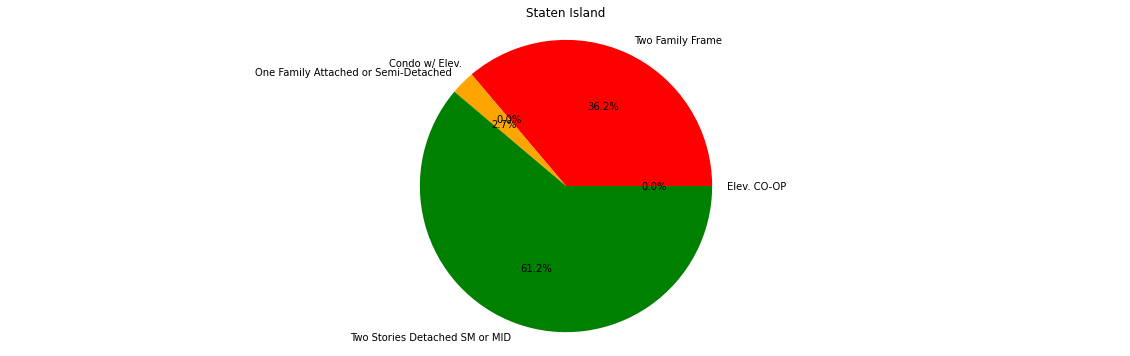

In [50]:
#Pie Chart showing Building Class of Sales in Staten Island across high subset
stat = high[high['BOROUGH'] == 'Staten Island']
values1 = [stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(), stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'B2'].sum(),
         stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ,stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP', 'Two Family Frame', 'Condo w/ Elev.', 'One Family Attached or Semi-Detached', 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'yellow', 'orange', 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Staten Island')
plt.show()

Building Pie charts with 0 vals: Low End

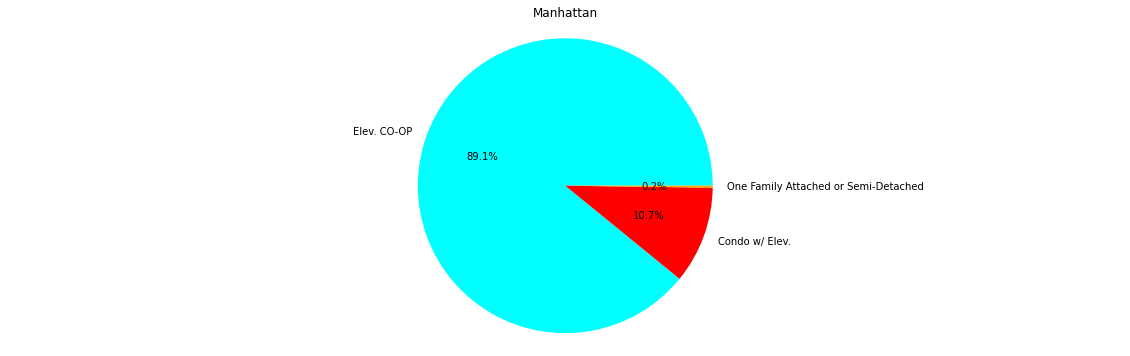

In [47]:
#Pie Chart showing building class of Property Sales in Manhattan across low subset
mann = low[low['BOROUGH'] == 'Manhattan']
values1 = [mann['SALE PRICE'][mann['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(),
         mann['SALE PRICE'][mann['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),mann['SALE PRICE'][mann['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ]#,mann['SALE PRICE'][mann['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP','Condo w/ Elev.', 'One Family Attached or Semi-Detached']#, 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'orange']#, 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Manhattan')
plt.show()

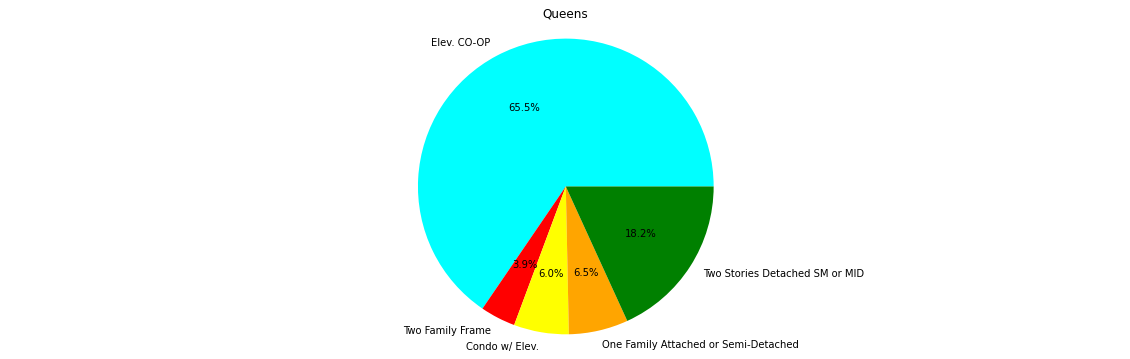

In [54]:
#Pie Chart Showing Building Class of Property Sales in Queens across low subset
queen = low[low['BOROUGH'] == 'Queens']
values1 = [queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(), queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'B2'].sum(),
         queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ,queen['SALE PRICE'][queen['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP', 'Two Family Frame', 'Condo w/ Elev.', 'One Family Attached or Semi-Detached', 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'yellow', 'orange', 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Queens')
plt.show()

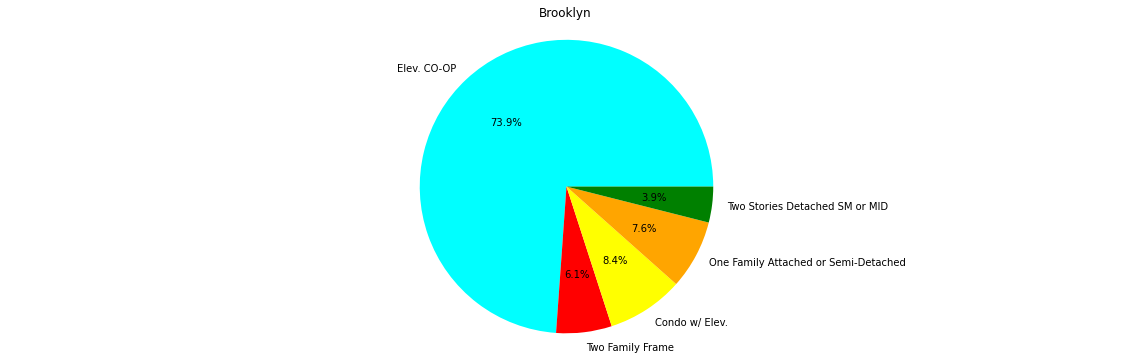

In [53]:
#Pie Chart showing Building Class of Property sales in Brooklyn across low subset
brook = low[low['BOROUGH'] == 'Brooklyn']
values1 = [brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(), brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'B2'].sum(),
         brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ,brook['SALE PRICE'][brook['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP', 'Two Family Frame', 'Condo w/ Elev.', 'One Family Attached or Semi-Detached', 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'yellow', 'orange', 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Brooklyn')
plt.show()

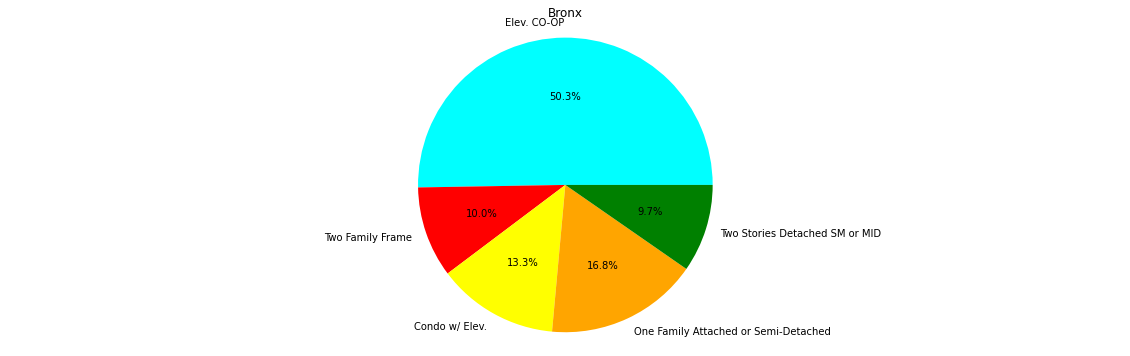

In [52]:
#Pie chart showing Building Class of Property sales in the Bronx across low subset
bronx = low[low['BOROUGH'] == 'Bronx']
values1 = [bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(), bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'B2'].sum(),
         bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ,bronx['SALE PRICE'][bronx['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP', 'Two Family Frame', 'Condo w/ Elev.', 'One Family Attached or Semi-Detached', 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'yellow', 'orange', 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Bronx')
plt.show()

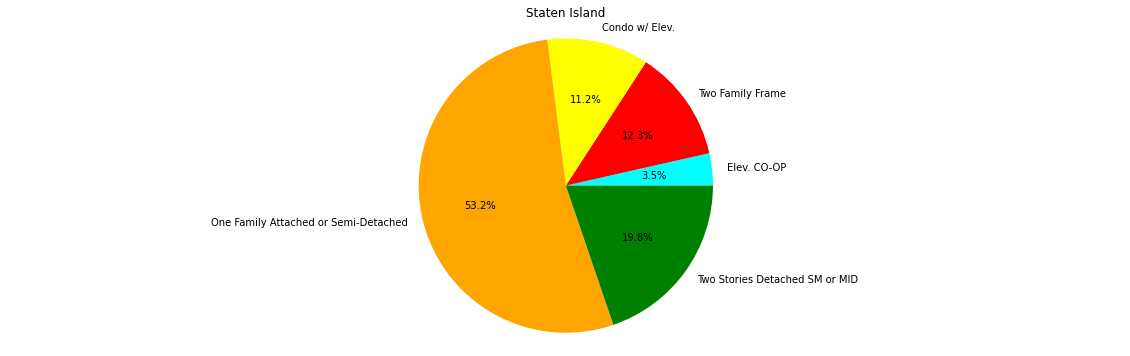

In [51]:
#Pie Chart Showing Building Class of Property Sales in Staten Island across low subset
stat = low[low['BOROUGH'] == 'Staten Island']
values1 = [stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'D4'].sum(), stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'B2'].sum(),
         stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'R4'].sum(),stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'A5'].sum()
          ,stat['SALE PRICE'][stat['BUILDING CLASS AT TIME OF SALE'] == 'A1'].sum()]
labels = ['Elev. CO-OP', 'Two Family Frame', 'Condo w/ Elev.', 'One Family Attached or Semi-Detached', 'Two Stories Detached SM or MID']
colors = ['cyan','red', 'yellow', 'orange', 'green']
plt.pie(values1,labels = labels,colors=colors, autopct = '%.1f%%')
plt.axis('equal')
plt.title('Staten Island')
plt.show()